# SENG 474 A02: Assignment 1
## Neural Networks 
Sean McAuliffe, V00913346  
February 3, 2023

---

We will use the suggested network architecture of 3 layers (one input layer, one hidden layer, and one output layer). The input layer will have 104 nodes, each representing a 
feature of the input feature vector.

We will experiment with different numbers of nodes in the hidden layer, and we will also experiment with the number of output nodes. One option is to have two nodes, one for each output classification (0, or 1), another possibility is 
to use a single output node which is meant to represent the magnitude of the predicted sample income. Magnitudes greather than 0.5 will be taken to be a prediction of 1, and magnitudes less than 0.5 will be taken to be a prediction of 0.

We will also experiment with different activation functions for the hidden layer, and we will also experiment with different activation functions for the output layer. We will also experiment with different loss functions, and we will also experiment with different optimizers, as well as other training hyperparameters.


---

## Environment Setup

In [5]:
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install sklearn
# !pip3 install matplotlib
# !pip3 install graphviz

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler, MinMaxScaler

---

## Data Preprocessing
Here the data is preprocessed according to the recommendation in Appendix A of the assignment specification. Specifically, for each feature of the training data, we normalize the feature to ensure that its minimum value is 0 and its maximum value is 1. We apply the same scaling to all datapoints for that feature. We also apply the same scaling to the test data.

In [8]:
income_dataset = np.genfromtxt('./cleaned_adult.csv', delimiter=',', skip_header=1, dtype=float)

scaler = MinMaxScaler(feature_range=(0,1), copy=False)
income_dataset = scaler.fit_transform(income_dataset)


def split_dataset(training_percent):
    """ Split the dataset into training and testing sets """
    np.random.shuffle(income_dataset)
    features = income_dataset[:, :-1]
    labels = income_dataset[:, -1]
    # https://www.statology.org/normalize-data-between-0-and-1/
    # For each feature, normalize the data to values are between 0 and 1
    # for i in range(features.shape[1]):
    #     features[:, i] =  (features[:, i] - features[:, i].min()) / (features[:, i].max() - features[:, i].min())
    training_features = features[:int(training_percent * features.shape[0])]
    training_labels = labels[:int(training_percent * labels.shape[0])]
    testing_features = features[int(training_percent * features.shape[0]):]
    testing_labels = labels[int(training_percent * labels.shape[0]):]
    return training_features, training_labels, testing_features, testing_labels

# Extract the featrue names from the first row of the dataset
feature_names = np.genfromtxt('./cleaned_adult.csv',
                                delimiter=',',
                                max_rows=1,
                                dtype=str)[:-1]
label_names = ['poor', 'rich']

print("Data ready for retrieval via split_dataset function...")


Data ready for retrieval via split_dataset function...


---
## Sample Neural Network Code

In [ ]:
# This example shows the construction of a neural network classifier, listing all
# of the sklearn MLP parameters and their default values.

warnings.filterwarnings("ignore", category=ConvergenceWarning)

mlpc = MLPClassifier(hidden_layer_sizes=(100,),
                    activation='relu',
                    solver='adam',
                    alpha=0.0001,
                    batch_size='auto',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    power_t=0.5,
                    max_iter=200,
                    shuffle=True,
                    random_state=None,
                    tol=0.0001,
                    verbose=False,
                    warm_start=False,
                    momentum=0.9,
                    nesterovs_momentum=True,
                    early_stopping=False,
                    validation_fraction=0.1,
                    beta_1=0.9,
                    beta_2=0.999,
                    epsilon=1e-08,
                    n_iter_no_change=10,
                    max_fun=15000)

X_train, y_train, X_test, y_test = split_dataset(0.8)
mlpc.fit(X_train, y_train)

print("Testing Accuracy: ", mlpc.score(X_test, y_test))
print("Training Accuracy: ", mlpc.score(X_train, y_train))


---

## Experiment 0: Reducing Training Runtime
In this experiment, we will modify some of the default training parameters in order to attempt to reduce the MLP training time, while still maintaining an accuracy close to  that achieved in the sample code above. This will become our starting point for future hyperparameter tuning experiments, in which we will have to train many models.

In [ ]:
# Experiment 0

# This example shows the construction of a neural network classifier, listing all
# of the sklearn MLP parameters and their default values.

warnings.filterwarnings("ignore", category=ConvergenceWarning)

mlpc = MLPClassifier(hidden_layer_sizes=(50,10, 10),
                    activation='relu',
                    solver='sgd', # stochastic gradient descent
                    alpha=0.0001,
                    batch_size='auto',
                    learning_rate='adaptive', # to prevent overshooting
                    learning_rate_init=0.001,
                    power_t=0.5,
                    max_iter=500,
                    shuffle=True,
                    random_state=None,
                    tol=0.0001,
                    verbose=False,
                    warm_start=False,
                    momentum=0.9,
                    nesterovs_momentum=True,
                    early_stopping=False,
                    validation_fraction=0.1,
                    beta_1=0.9,
                    beta_2=0.999,
                    epsilon=1e-08,
                    n_iter_no_change=10,
                    max_fun=15000)

# Split the dataset into training and testing sets
X_train, y_train, X_test, y_test = split_dataset(0.8)
mlpc.fit(X_train, y_train)

print("Testing Accuracy: ", mlpc.score(X_test, y_test))
print("Training Accuracy: ", mlpc.score(X_train, y_train))


In brief testing with each of the major hyperparameters, none obviously decreases the training time of an MLP classifier. So we will begin the hyper parameter search with the default values for all hyperparameters, and parameterize over one at a time; measuring the training and testing error for each model.

---

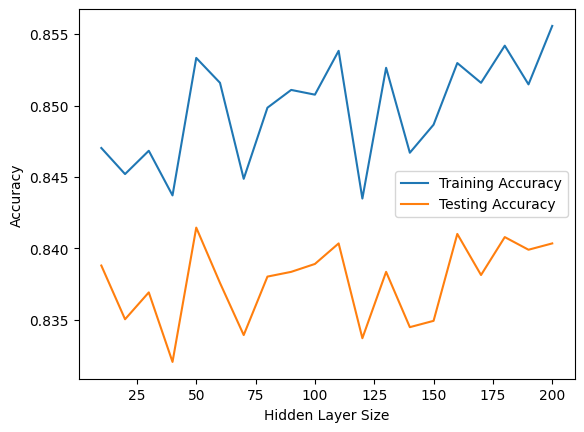

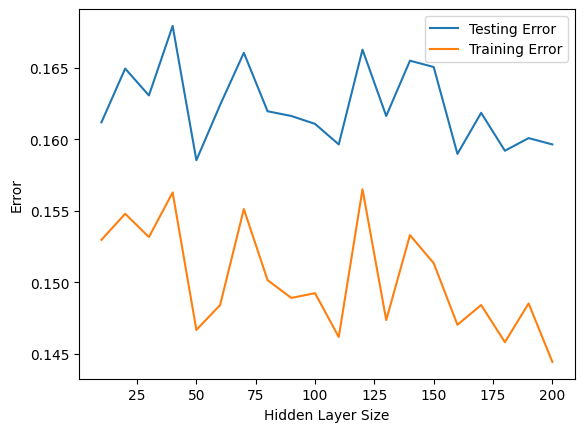

In [6]:
# Experiment 1: Varying the size of the hidden layer

warnings.filterwarnings("ignore", category=ConvergenceWarning)

X_train, y_train, X_test, y_test = split_dataset(0.8)

hidden_layer_sizes = [10*x for x in range(1, 21)]

training_accuracy = []
testing_accuracy = []

for hls in hidden_layer_sizes:
    mlpc = MLPClassifier(hidden_layer_sizes=(hls,),
                        activation='relu',
                        solver='sgd', # stochastic gradient descent
                        alpha=0.0001,
                        batch_size='auto',
                        learning_rate='adaptive', # to prevent overshooting
                        learning_rate_init=0.001,
                        power_t=0.5,
                        max_iter=500,
                        shuffle=True,
                        random_state=None,
                        tol=0.0001,
                        verbose=False,
                        warm_start=False,
                        momentum=0.9,
                        nesterovs_momentum=True,
                        early_stopping=False,
                        validation_fraction=0.1,
                        beta_1=0.9,
                        beta_2=0.999,
                        epsilon=1e-08,
                        n_iter_no_change=10,
                        max_fun=15000)
    mlpc.fit(X_train, y_train)
    training_accuracy.append(mlpc.score(X_train, y_train))
    testing_accuracy.append(mlpc.score(X_test, y_test))


# Plot the accuracy
plt.plot(hidden_layer_sizes, training_accuracy, label='Training Accuracy')
plt.plot(hidden_layer_sizes, testing_accuracy, label='Testing Accuracy')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the error by subtracting the testing accuracy from 1
plt.plot(hidden_layer_sizes, [1 - x for x in testing_accuracy], label='Testing Error')
plt.plot(hidden_layer_sizes, [1 - x for x in training_accuracy], label='Training Error')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Error')
plt.legend()
plt.show()



In [7]:
best_hls = hidden_layer_sizes[np.argmax(testing_accuracy)]
print("Best hidden layer size: ", best_hls)

Best hidden layer size:  50


Results of Experiment 1:
The size of the hidden layer does not seem to correlate nicely with the resulting model accuracy. It is possible that other NN architecture (with different numbers and sizes of hidden layers) could show a clearer pattern. However, there does seem to be a general (if noisy) trend upwards as the size of the hidden layer is increased. In this experiment the best model test accuracy was achieved at a hidden layer size of 50, which, after which there is a sharp decrease followed by a slow climb back upwards out to 200 nodes.

We will use a hidden layer size of 50 for the remainder of the experiments.

---

In [4]:
# Experiment 2: Varying the solver and activation function of the optimal size hidden layer

warnings.filterwarnings("ignore", category=ConvergenceWarning)

X_train, y_train, X_test, y_test = split_dataset(0.8)

solvers = ['lbfgs', 'sgd', 'adam']
activations = ['identity', 'logistic', 'tanh', 'relu']

testing_accuracy = {'lbfgs' : {'identity': [], 'logistic': [], 'tanh': [], 'relu': []},
                    'sgd' : {'identity': [], 'logistic': [], 'tanh': [], 'relu': []},
                    'adam' : {'identity': [], 'logistic': [], 'tanh': [], 'relu': []}}

for solver in solvers:
    for activation in activations:
        mlpc = MLPClassifier(hidden_layer_sizes=(50,),
                            activation=activation,
                            solver=solver,
                            learning_rate='adaptive') # to prevent overshooting
        mlpc.fit(X_train, y_train)
        testing_accuracy[solver][activation].append(mlpc.score(X_test, y_test))

# Plot the testing accuracy for each combination of solver and activation function
# Plot each pair as a bar on the same bar graph
# The x-axis will be the activation function
# The y-axis will be the testing accuracy
# The bars will be the solvers
for solver in solvers:
    for activation in activations:
        print(f"{solver} + {activation} combination accuracy {testing_accuracy[solver][activation][0]}")


lbfgs + identity combination accuracy 0.8514096185737977
lbfgs + logistic combination accuracy 0.8516307352128247
lbfgs + tanh combination accuracy 0.8477611940298507
lbfgs + relu combination accuracy 0.8524046434494196
sgd + identity combination accuracy 0.8420121614151465
sgd + logistic combination accuracy 0.8322830292979547
sgd + tanh combination accuracy 0.8440022111663903
sgd + relu combination accuracy 0.8430071862907684
adam + identity combination accuracy 0.8501934770591487
adam + logistic combination accuracy 0.8494195688225539
adam + tanh combination accuracy 0.849640685461581
adam + relu combination accuracy 0.8462133775566612


Results of experiment 2:

The best combination of solver and activation function is lbfgs and ReLU. This combination will be used in following experiments.

---

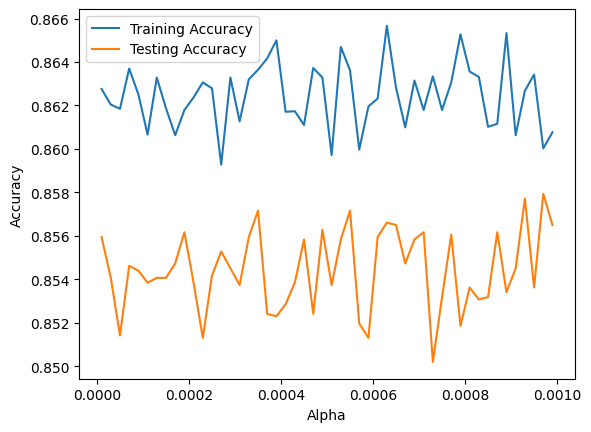

In [6]:
# Experiment 3: Varying the L2 Regularization Term, Alpha

warnings.filterwarnings("ignore", category=ConvergenceWarning)

X_train, y_train, X_test, y_test = split_dataset(0.8)

alphas = [0.00001*x for x in range(1, 101, 2)]

training_accuracy = []
testing_accuracy = []

for alpha in alphas:
    mlpc = MLPClassifier(hidden_layer_sizes=(50,),
                        activation='relu',
                        solver='lbfgs',
                        alpha=alpha)

    mlpc.fit(X_train, y_train)
    training_accuracy.append(mlpc.score(X_train, y_train))
    testing_accuracy.append(mlpc.score(X_test, y_test))

# Plot the error
plt.plot(alphas, training_accuracy, label='Training Accuracy')
plt.plot(alphas, testing_accuracy, label='Testing Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Results of Experiment 3:


---

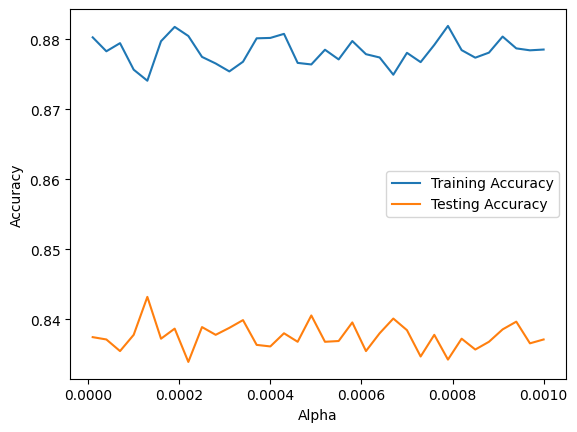

In [8]:
# Experiment 4: Varying the L2 Regularization Term, Alpha
# this time with a high number of max. iterations to prevent
# non-convergence

X_train, y_train, X_test, y_test = split_dataset(0.8)

alphas = [0.00001*x for x in range(1, 101, 3)]

training_accuracy = []
testing_accuracy = []

for alpha in alphas:
    mlpc = MLPClassifier(hidden_layer_sizes=(50,),
                        activation='relu',
                        solver='lbfgs',
                        alpha=alpha,
                        max_iter=800)

    mlpc.fit(X_train, y_train)
    training_accuracy.append(mlpc.score(X_train, y_train))
    testing_accuracy.append(mlpc.score(X_test, y_test))

# Plot the error
plt.plot(alphas, training_accuracy, label='Training Accuracy')
plt.plot(alphas, testing_accuracy, label='Testing Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Increasing the maximum number of iterations does not seem to improve the testing accuracy of the model, in the above experiment it actually appears to have reduced it. It did however increase the training accuracy, which may be evidence of overfitting. 

The optimal value for alpha appears to be 0.0001, which is the default value.

---

## Alternative Network Architectures
This section will experiment with other numbers and sizes of hidden layers.

/home/sean/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/sean/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/sean/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

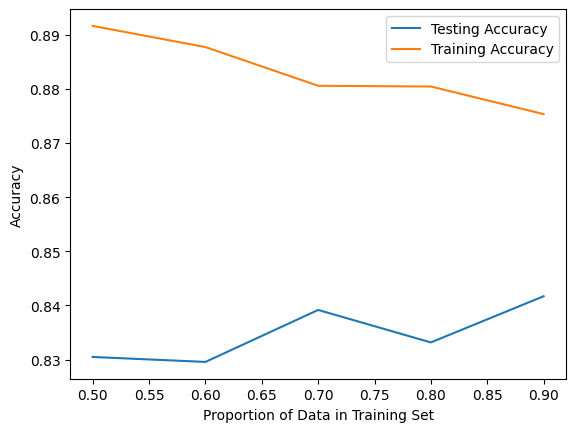

In [9]:
# Varying the size of the propotion of data in the training set

proportions = [0.1*x for x in range(5, 10)]

test_accuracy = []
train_accuracy = []

for p in proportions:
    X_train, y_train, X_test, y_test = split_dataset(p)

    mlpc = MLPClassifier(hidden_layer_sizes=(50,),
                        activation='relu',
                        solver='lbfgs',
                        learning_rate='adaptive',
                        max_iter=1000,
                        tol=0.0001,
                        n_iter_no_change=10,
                        max_fun=15000)
    mlpc.fit(X_train, y_train)
    test_accuracy.append(mlpc.score(X_test, y_test))
    train_accuracy.append(mlpc.score(X_train, y_train))


# Plot the accuracy against the proportion
plt.plot(proportions, test_accuracy, label='Testing Accuracy')
plt.plot(proportions, train_accuracy, label='Training Accuracy')
plt.xlabel('Proportion of Data in Training Set')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [13]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

X_train, y_train, X_test, y_test = split_dataset(0.8)

test_accuracy = []
train_accuracy = []

mlpc1 = MLPClassifier(hidden_layer_sizes=(10,10,10),
                    activation='relu',
                    solver='lbfgs',
                    learning_rate='adaptive',
                    max_iter=500)
mlpc1.fit(X_train, y_train)

print(f"10, 10, 10: {mlpc1.score(X_test, y_test)}")

mlpc2 = MLPClassifier(hidden_layer_sizes=(50,10),
                    activation='relu',
                    solver='lbfgs',
                    learning_rate='adaptive',
                    max_iter=500)
mlpc2.fit(X_train, y_train)

print(f"50, 10: {mlpc2.score(X_test, y_test)}")

mlpc3 = MLPClassifier(hidden_layer_sizes=(11,4,2),
                    activation='relu',
                    solver='lbfgs',
                    learning_rate='adaptive',
                    max_iter=500)
mlpc3.fit(X_train, y_train)

print(f"11, 4, 2: {mlpc3.score(X_test, y_test)}")



10, 10, 10: 0.8525152017689331
50, 10: 0.8448866777224986
11, 4, 2: 0.8465450525152017


In [14]:
mlpc3 = MLPClassifier(hidden_layer_sizes=(20,20,20,20),
                    activation='relu',
                    solver='lbfgs',
                    learning_rate='adaptive',
                    max_iter=500)
mlpc3.fit(X_train, y_train)

print(f"11, 4, 2: {mlpc3.score(X_test, y_test)}")

11, 4, 2: 0.8494195688225539
